In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
print("imported!")

imported!


In [26]:
#Reading and discovering the Dataset:
Data=pd.read_csv('train.csv')
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
#Dropping some useless features:
Data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [29]:
#Looking for missing values:
print("#Age missing entries =",Data.Age.isnull().sum())
print("#survived missing entries =",Data.Survived.isnull().sum())
print("#Pclass missing entries =",Data.Pclass.isnull().sum())
print("#SibSp missing entries =",Data.SibSp.isnull().sum())
print("#Parch missing entries =",Data.Parch.isnull().sum())
print("#Fare missing entries =",Data.Fare.isnull().sum())
print("#Cabin missing entries =",Data.Cabin.isnull().sum())
print("#Embarked missing entries =",Data.Embarked.isnull().sum())

#Age missing entries = 177
#survived missing entries = 0
#Pclass missing entries = 0
#SibSp missing entries = 0
#Parch missing entries = 0
#Fare missing entries = 0
#Cabin missing entries = 687
#Embarked missing entries = 2


In [28]:
Data[Data.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B28,NaN
829,1,1,female,62.0,0,0,80.0,B28,NaN


C:\Users\hga\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


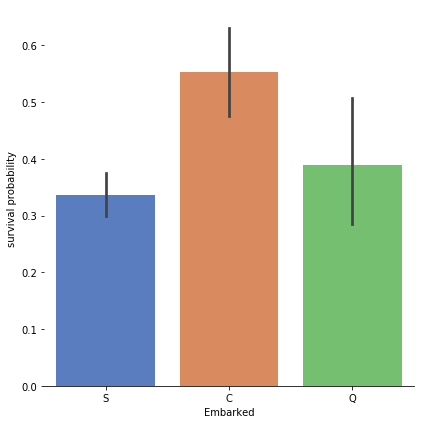

In [30]:
#The two empty records are for people who survived, let's check which Embarking
#region is more likely to survive, so that we can fill those two missing records.
g = sns.catplot(x="Embarked", y="Survived",  data=Data,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

In [34]:
#As we see:

#55% embarked from 'C' survived.
#35% embarked from 'Q' survived.
#32% embarked from 'S' survived.
#So, it seems reasonable to fill the empty records with 'C'.
Data=Data.fillna({'Embarked':'C'})
print("#Embarked missing entries =",Data.Embarked.isnull().sum())

#Embarked missing entries = 0


In [35]:
#Let's drop the Cabin feature as it has more than 80% empty entries.
Data.drop(['Cabin'],axis=1,inplace=True)
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [36]:
#Media do Fare/tarifa
Data.Fare.mean()

32.2042079685746

In [37]:

Data['Sex']=Data['Sex'].replace(['male','female'],[0,1])
Data['Embarked']=Data['Embarked'].replace(['S','C','Q'],[0,1,2])
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


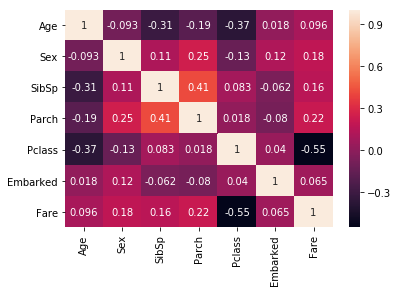

In [53]:
#It seems that age feature is most correlated to features "Pclass" and "SibSp" respectively, 
#so we will fill NaN age values with the mean or median of each group of these two features.
sns.heatmap(Data[["Age","Sex","SibSp","Parch","Pclass","Embarked","Fare"]].corr(),annot=True)

In [42]:
Data.Pclass.max()

3

In [51]:
#Looking for missing values:
print("#Age missing entries =",Data.Age.isnull().sum())
print("#Age missing entries =",Data.Age.mean())

#Age missing entries = 177
#Age missing entries = 29.69911764705882


In [54]:
age_medians=np.zeros((3,9))
median=Data.Age.median()
for classNum in range (0,Data.Pclass.max()):  # 0 --> 1st class
    for sibNum in range (0,Data.SibSp.max()+1): # adding one to take the range [0,8] not [0,8[.
        age_medians[classNum][sibNum]=Data["Age"][(Data["Pclass"]==(classNum+1)) & (Data["SibSp"]==sibNum)].median()
        if np.isnan(age_medians[classNum][sibNum]):
            age_medians[classNum][sibNum]=median


In [55]:
print(age_medians)

[[37.  38.  44.  23.  28.  28.  28.  28.  28. ]
 [30.  29.  23.5 30.  28.  28.  28.  28.  28. ]
 [26.  25.  19.5  6.   6.5 11.  28.  28.  28. ]]


In [56]:
Null_indx=list(Data["Age"][Data["Age"].isnull()].index)

In [58]:
for i in Null_indx:
    Data["Age"].iloc[i]=age_medians[Data.Pclass[i] - 1][Data.SibSp[i]]
    
print("#Age missing entries =",Data.Age.isnull().sum())

C:\Users\hga\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#Age missing entries = 0


In [59]:
#Now, our data is cleaned and nothing is missing!

#Lets, split our data into train and test sets using Sklearn built in function.
Y = Data.Survived
X = Data
X.drop(['Survived'],axis=1,inplace=True)

In [60]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=3)

In [62]:
#It's time for Calling in Naive Bayes!
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
predicts = classifier.predict(X_test)
accuracy = round(accuracy_score(predicts,Y_test),3)
print(accuracy)

0.743


In [ ]:
#Creating the submission file:
test = pd.read_csv('test.csv')
IDs = test.PassengerId
test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
test.head()